# Téléchargement du dataset depuis Kaggle

In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from dotenv import load_dotenv
import pandas as pd


def download_dataset(dataset_name, destination_dir="../data"):
    try:
        if not os.path.exists(destination_dir):
            os.makedirs(destination_dir)

        api.dataset_download_files(dataset_name, path=destination_dir, unzip=True)

    except Exception as e:
        print(f"Erreur lors du téléchargement : {e}")

load_dotenv()
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

api = KaggleApi()

try:
    api.authenticate()    
except Exception as e:
    print(f"Erreur d'authentification : {e}")

try:
    download_dataset("sumanthvrao/daily-climate-time-series-data")
except Exception as e:
    print(f"Erreur lors du téléchargement du dataset : {e}")

train_path = "../data/DailyDelhiClimateTrain.csv"
test_path = "../data/DailyDelhiClimateTest.csv"

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
except FileNotFoundError as e:
    print(f"Erreur lors du chargement des fichiers : {e}")


Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


# Apercu du fichier

In [3]:
display(test_df.head())

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


Nous nous intéresserons ici seulement à la colonne `meantemp`, qui représente la température moyenne

## Valeurs manquantes

Voyons maintenant si des valeurs sont manquantes dans la colonne qui nous interesse : `meantemp`

In [4]:
isAnyValueMissing = train_df["meantemp"].isnull().any()

if isAnyValueMissing:
    print("Il y a au moins une valeur manquante")
else:
    print("La colonne ne contient aucune valeur manquante")

La colonne ne contient aucune valeur manquante


Nous remarquons donc aucune valeur manquante. Cependant des valeurs pourrait être abérrante voyons si c'est le cas

In [5]:
print(train_df["meantemp"].describe())

count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64


Conclusion :
Les températures varient entre 6°C et 38,71°C, ce qui correspond à des valeurs plausibles dans le contexte étudié (New Delhi).


# Exploration des données

## Fréquence des données

In [6]:
train_df["date"] = pd.to_datetime(train_df["date"])

diffs = train_df["date"].diff()

print(diffs.value_counts())

date
1 days    1461
Name: count, dtype: int64


On remarque que la fréquence des données est constante, avec un intervalle d’un jour entre chaque enregistrement.
Cela signifie que le jeu de données est à **fréquence quotidienne**.

## Tendance

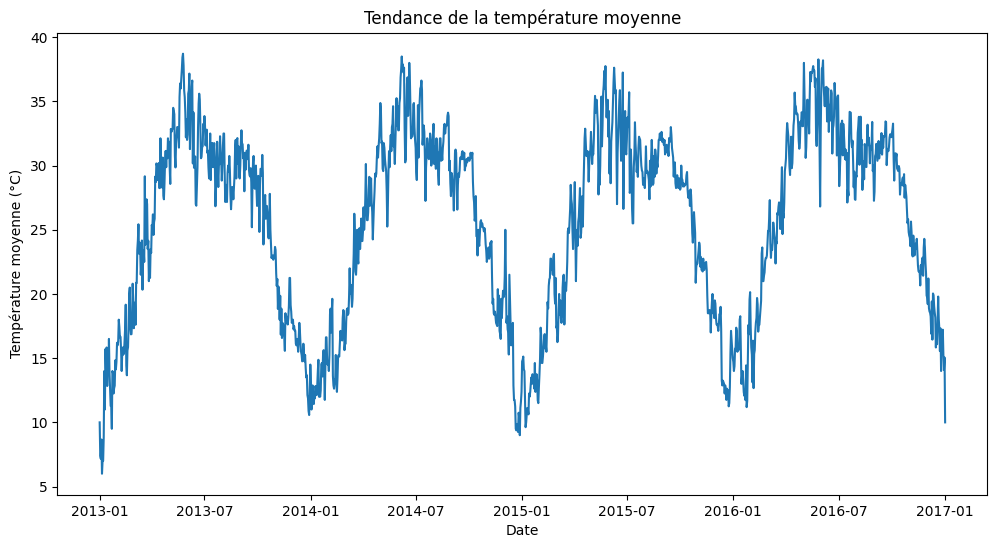

In [7]:
import matplotlib.pyplot as plt

train_df["date"] = pd.to_datetime(train_df["date"])

plt.figure(figsize=(12, 6))  # Largeur x Hauteur
plt.plot(train_df["date"], train_df["meantemp"])
plt.title("Tendance de la température moyenne")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")
plt.show()

Le graphique de la température moyenne journalière met en évidence un cycle claire, avec une hausse progressive des températures au printemps, un pic en été, suivi d’une baisse en automne et en hiver, qui se répète chaque année.

## Saisonalité

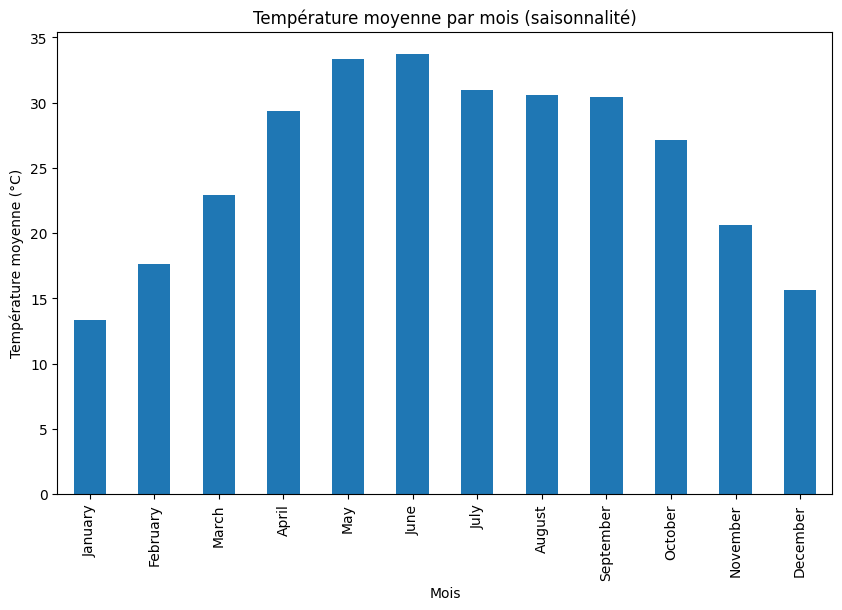

In [8]:
import matplotlib.pyplot as plt

import calendar

train_df["date"] = pd.to_datetime(train_df["date"])

train_df["month"] = train_df["date"].dt.month
monthly_avg = train_df.groupby("month")["meantemp"].mean()


plt.figure(figsize=(10, 6)) 

monthly_avg.plot(kind="bar")


plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])


plt.title("Température moyenne par mois (saisonnalité)")
plt.xlabel("Mois")
plt.ylabel("Température moyenne (°C)")
plt.show()

Les températures sont les plus basses en hiver (janvier, décembre), augmentent progressivement au printemps, atteignent un maximum en mai-juin, puis redescendent vers l’automne et l’hiver.